Although the signal data are separated by a batch whose size is 500,000, we cannot be sure if the signal is similar within the batch and distinctively different across the batch. One naive way to see this is **auto- correlation**, which is helpful finding a repeated pattern.

The data are from [Data Without Drift with Kalman filter](https://www.kaggle.com/michaln/data-without-drift-with-kalman-filter).

# Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
# from matplotlib_venn import venn2
import seaborn as sns
sns.set_context("talk")
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../input/sample_submission.csv
../input/test.csv
../input/test_clean.csv
../input/train.csv
../input/train_clean.csv


# Load data

In [2]:
train = pd.read_csv("../input/train_clean.csv")
test = pd.read_csv("../input/test_clean.csv")

In [3]:
train_signal = train["signal"].values.reshape(-1,500000)
test_signal = test["signal"].values.reshape(-1,100000)

In [4]:
test_signal.shape

(20, 100000)

# Autocorrelation

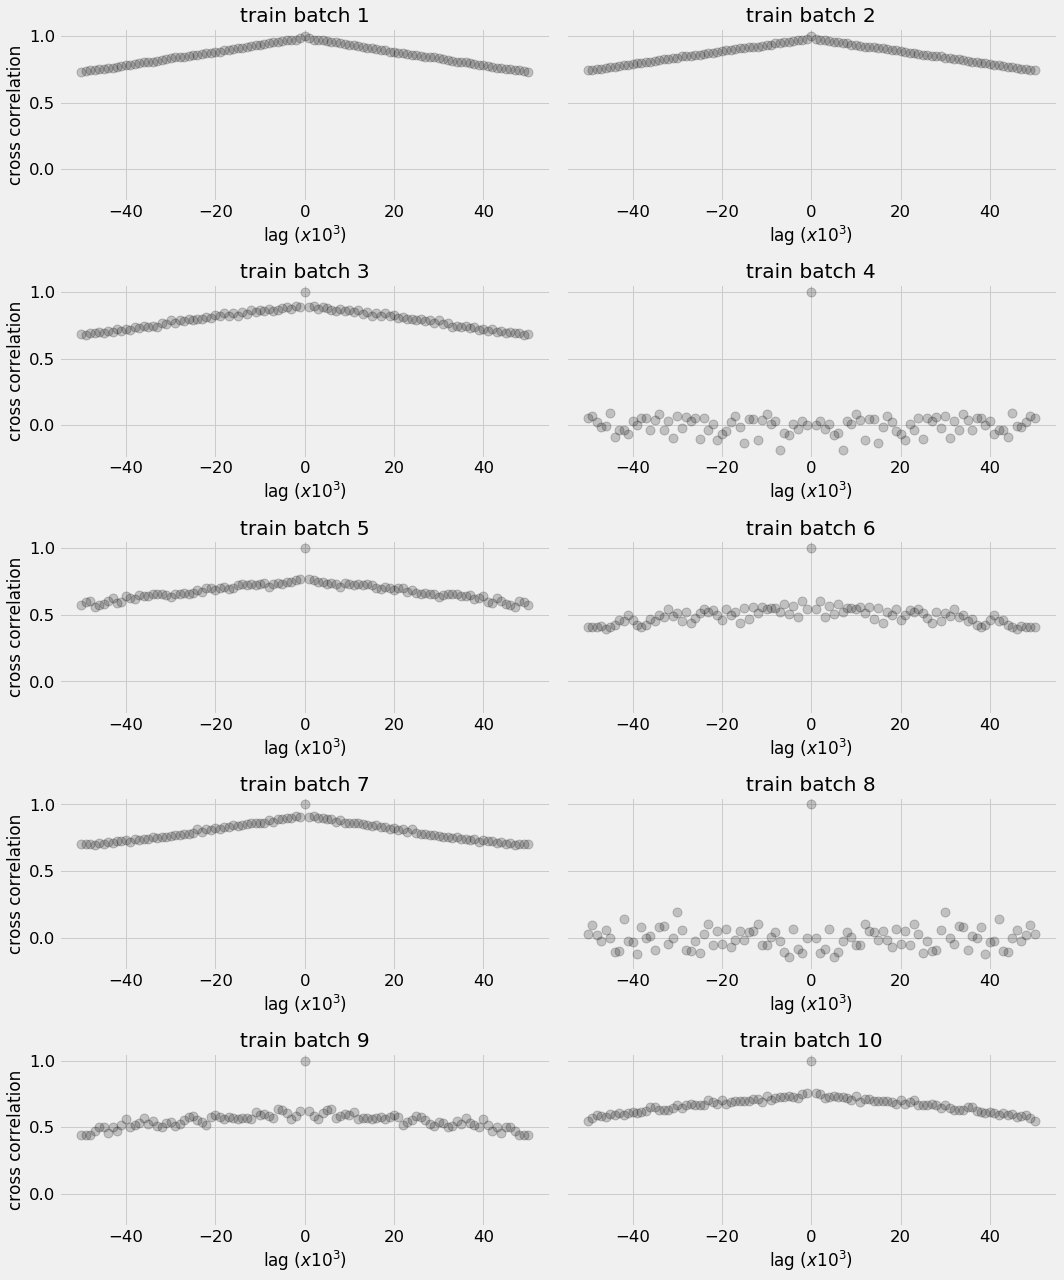

In [5]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18), sharey="all")
ax = ax.flatten()
for i, a in enumerate(ax):
    a.acorr(train_signal[i,::2500], usevlines=False, normed=True, maxlags=50, lw=.5, alpha=0.2, color="k");
    a.set_xlabel("lag ($x10^{3}$)")
    a.set_title(f"train batch {i+1}")
    if i % 2 == 0:
        a.set_ylabel("cross correlation")
plt.tight_layout()

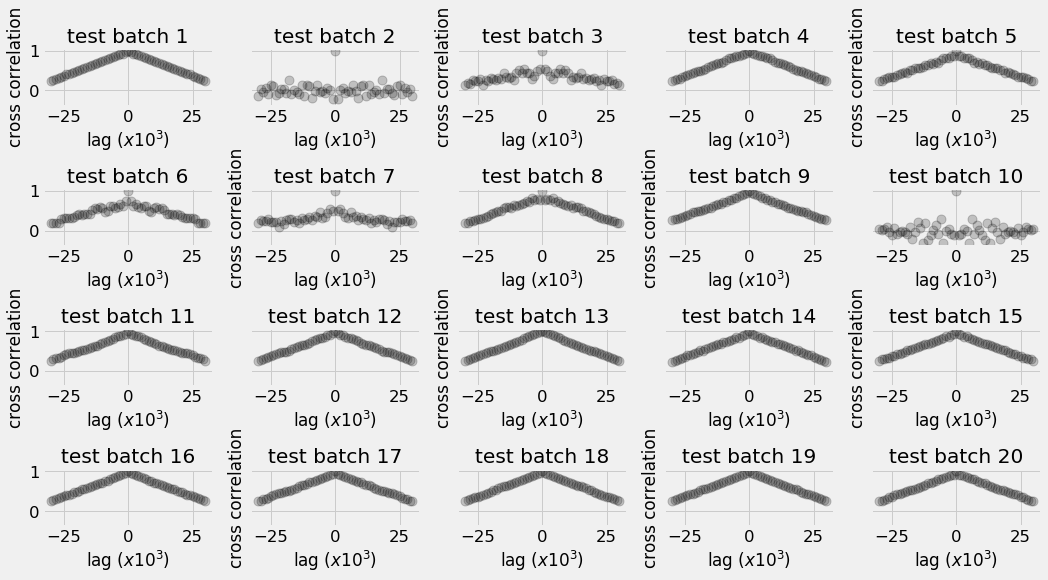

In [13]:
fig, ax = plt.subplots(4, 5, figsize=(15, 8), sharey="all")
ax = ax.flatten()
for i, a in enumerate(ax):
    a.acorr(test_signal[i,::2500], usevlines=False, normed=True, maxlags=30, lw=.5, alpha=0.2, color="k");
    a.set_xlabel("lag ($x10^{3}$)")
    a.set_title(f"test batch {i+1}")
    if i % 2 == 0:
        a.set_ylabel("cross correlation")
plt.tight_layout()

# Observations

Interesting, the auto-correlation structure is very different across the "batches"! We might want to think about how to deal with them rather than just fitting a single model across the "batches".